<h1>Classification model</h1>

Creation, analysis and validation of random forest classifier model, to predict if some one earns more than 15k.

In [69]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from yellowbrick.classifier.threshold import discrimination_threshold
from ipynb.fs.full.funPyModeling import status

<h3>Data Loading</h3>

Using the data from another script (data preparation)

In [70]:
with open('data/d_eph5.pickle', 'rb') as handle:
    data = pickle.load(handle)

<h3>Dataset Status</h3>

In [71]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,sexo_mujer,0,0.0,2226,0.633106,2,uint8
1,alfabeto_Si,0,0.0,23,0.006542,2,uint8
2,sistema_salud_Mutual/prepaga/servicio de emerg...,0,0.0,3513,0.999147,2,uint8
3,sistema_salud_No paga ni le descuentan,0,0.0,1817,0.516780,2,uint8
4,sistema_salud_Ns./Nr.,0,0.0,3512,0.998862,2,uint8
5,sistema_salud_Obra social (incluye PAMI),0,0.0,2043,0.581058,2,uint8
6,sistema_salud_Obra social y mutual/prepaga/ser...,0,0.0,3444,0.979522,2,uint8
7,sistema_salud_Planes y seguros públicos,0,0.0,3471,0.987201,2,uint8
8,nivel_educativo_Primaria Incompleta(incluye ed...,0,0.0,3316,0.943117,2,uint8
9,nivel_educativo_Secundaria Completa,0,0.0,2601,0.739761,2,uint8


In this dataset, there aren't NaNs or categorical variables

<h3>Data Preparation</h3>

In [72]:
data_x = data.drop('ingreso_15k_si', axis=1)
data_y = data['ingreso_15k_si']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

<h3>Model creation (Random forest classifier)</h3>

In [74]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 99, min_samples_leaf = 40)
rf.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=40, n_estimators=1000, random_state=99)

<h3>Class prediction and score</h3>

In [75]:
pred_probs = rf.predict_proba(x_train)

In [76]:
y_prob_tr = pred_probs[:,1]

<h3>Confusion matrix</h3>

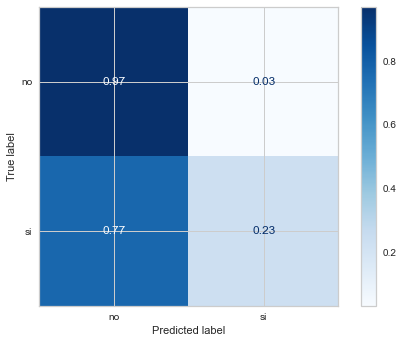

In [77]:
plot_confusion_matrix(rf, x_train, y_train,
                      display_labels=['no','si'],
                      cmap='Blues',
                      normalize='true',
                     )

<h3>Changing the threshold value</h3>

In [78]:
y_prob_tr.mean()

0.2724986382601033

In [79]:
y_pred2 = np.where(y_prob_tr > 0.27, 1, 0)

<AxesSubplot:xlabel='Pred', ylabel='Actual'>

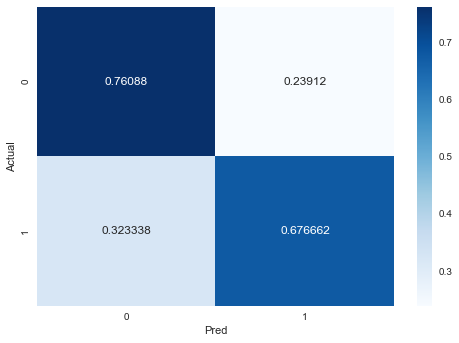

In [80]:
conf_mat2=pd.crosstab(index=y_train, 
                      columns=y_pred2,  # cambio!
                      rownames=['Actual'], 
                      colnames=['Pred'], 
                      normalize='index')

import seaborn as sns
sns.heatmap(conf_mat2, annot=True, cmap='Blues', fmt='g')

Changing the threshold value to the mean of the prediction, the true positive value increases, but the true negative decreases, as i expected.

<h3>Analyzing the different threshold value</h3>

C:\Users\Tec\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\Users\Tec\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Tec\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Tec\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing 

C:\Users\Tec\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Tec\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Tec\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Tec\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will b

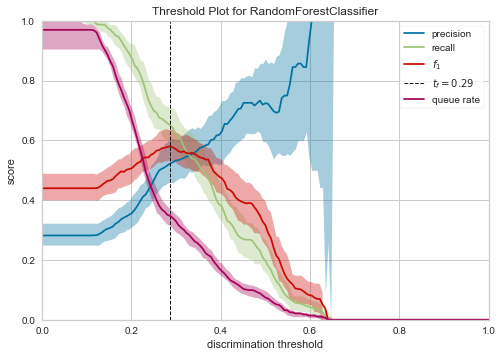

C:\Users\Tec\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


DiscriminationThreshold(ax=<AxesSubplot:title={'center':'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>,
                        force_model=None, model=None)

In [81]:
dis_res = discrimination_threshold(rf, x_train, y_train)
dis_res

<h3>ROC curve</h3>

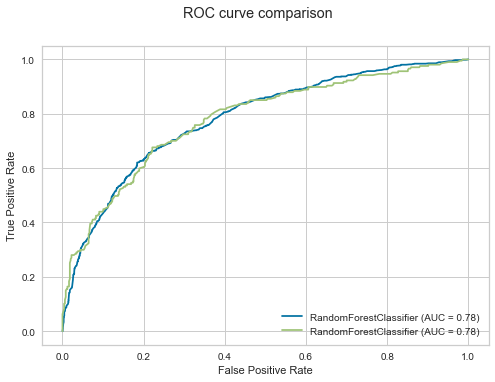

In [82]:
tr_disp = plot_roc_curve(rf, x_train, y_train)
ts_disp = plot_roc_curve(rf, x_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

<h3>Save Model</h3>

In [84]:
filename = 'rf_2.pkl'
pickle.dump(rf, open(filename, 'wb'))

<h3>Insights</h3>

In this model, changing the threshold value to the mean of the predicted probabilities, the confusion matrix shows a better perfomance. 
Next, with this hyperparameters, the models doesnt overfit (the AUC values are the same for training and testing), so, this will be a decent model.